In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set();

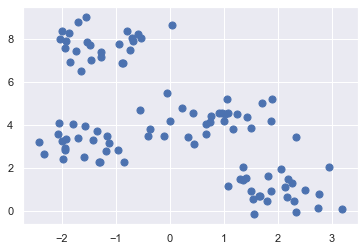

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=100, centers=4, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [6]:
from sklearn.cluster import KMeans
pred = KMeans(n_clusters=4)
pred.fit(X)
y_pred = pred.predict(X)

In [8]:
y_pred

array([0, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 3, 2, 0, 1,
       3, 2, 0, 3, 0, 0, 2, 2, 2, 1, 2, 2, 3, 0, 1, 2, 1, 3, 0, 3, 1, 3,
       3, 1, 2, 3, 0, 0, 0, 2, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       3, 3, 2, 0, 1, 2, 0, 1, 0, 0, 3, 3, 2, 2, 2, 1, 3, 0, 2, 3, 2, 2,
       0, 0, 0, 3, 0, 3, 3, 1, 1, 3, 1, 0])

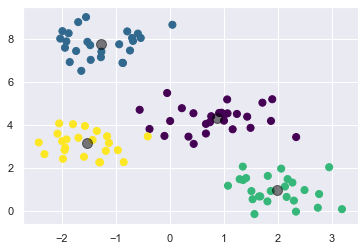

In [10]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_cluster, rseed=2):
    # Choosing clusters randomly
    rand_state = np.random.RandomState(rseed)
    i = rand_state.permutation(X.shape[0])[: n_cluster]
    centers = X[i]

    while True:
        # assigning labels based on closest centers
        labels = pairwise_distances_argmin(X, centers)
        # Finding new centers for means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_cluster)])

        # checking for convergence
        if np.all(new_centers == centers):
            break
        centers = new_centers

    return centers

centers = find_clusters(X, 4)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.50)
